# General approaches for metrics optimization


### Goal:
- Loss vs metric
- Approaches to metric optimization in general


#### Loss vs Metric
- For example, for classification task, we may want to maximize accuracy of our predictions, how frequently the model outputs the correct label. But no one knows how to optimize a target efficiently, so we use proxy loss function
- Target metric is what we want to optimize
- Optimization loss is what model optimizes (the proxy loss function)
- Sometimes the model can optimize target metric directly eg mean square error metric. So in this case, the loss function is the same as the target metric.
- Sometimes we want to optimize metrics that are really hard or even impossible to optimize directly. In this case, we usually set the model to optimize a loss that is different to a target metric. But after the model is trained, we use hacks and heuristics to negate the discrepancy and adjust the model to better fit the target metric
- synomyms: loss, cost, objective


#### Approaches for target metric optimization
- Some metrics can be opimized directly eg MSE, logloss. These metrics are implemented as loss function in almost every library.
- For some of the metrics that cannot be optimized directly (eg MSPE, MAPE, RMSLE), we can preporcess train and use a model with a metric or loss function that is easy to optimize.
  - Eg while MSPE metric can not be optimized directly with XGBoost, we will see later that we can resample the train set and optimize MSE loss instead
- Sometimes we will optimize incorrect metric (eg Accuracy, Kappa) but we'll post-process the predictions to fit classification, so it will fit the competition metric better.
- For some models and frameworks, it is possible to define a custom loss function, and sometimes it's possible to implement a loss function which will serve as a nice proxy for the desired metric.
  - Eg it can be done for quadratic-weighted Kappa
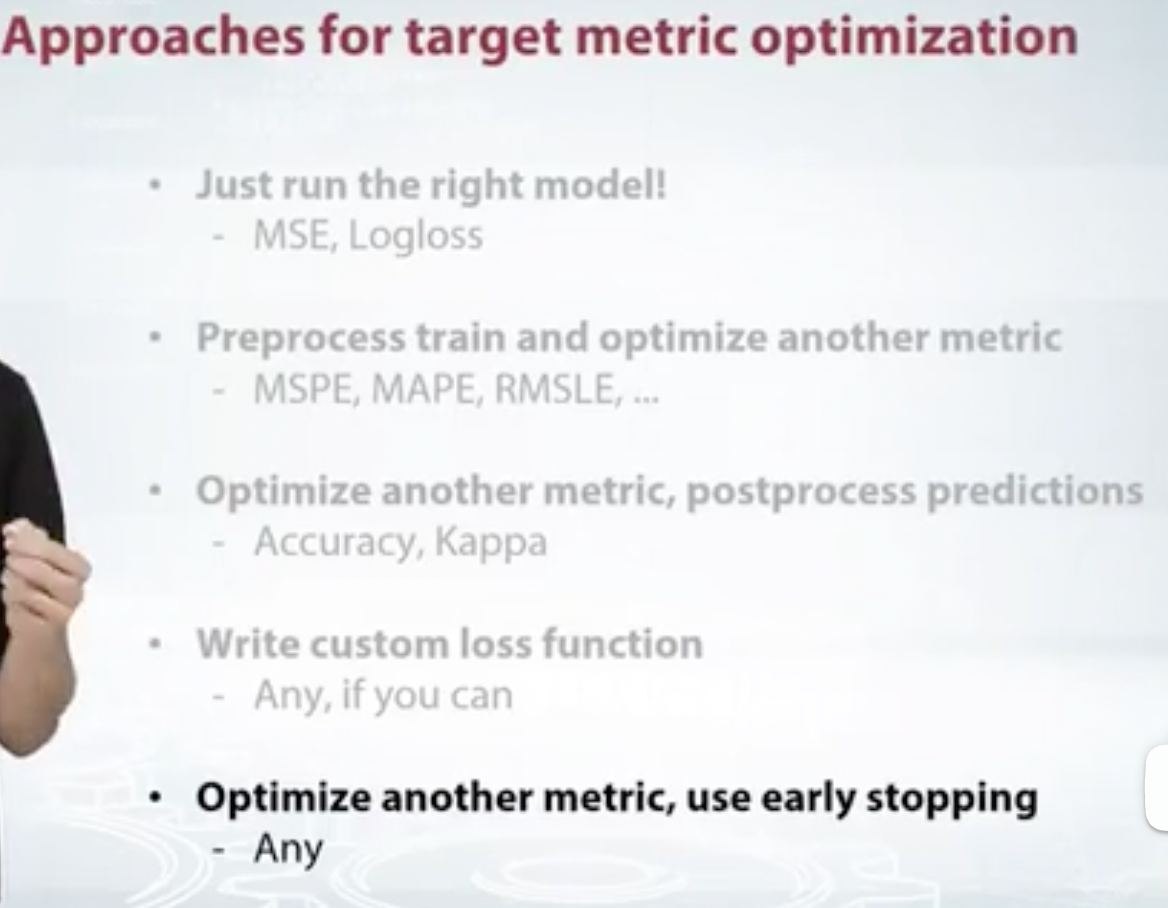
- Sometimes it is hard to come up with a neat optimization procedure or write a custom loss function, in such cases, we can consider early stopping.

### Custom loss
- It is actually easy to implement a custom loss function for XGBoost, we only need to implement a single function that takes predictions and the target values and computes first and second-order derivates of the loss function with respect to the model's predictions. This is an example for logloss
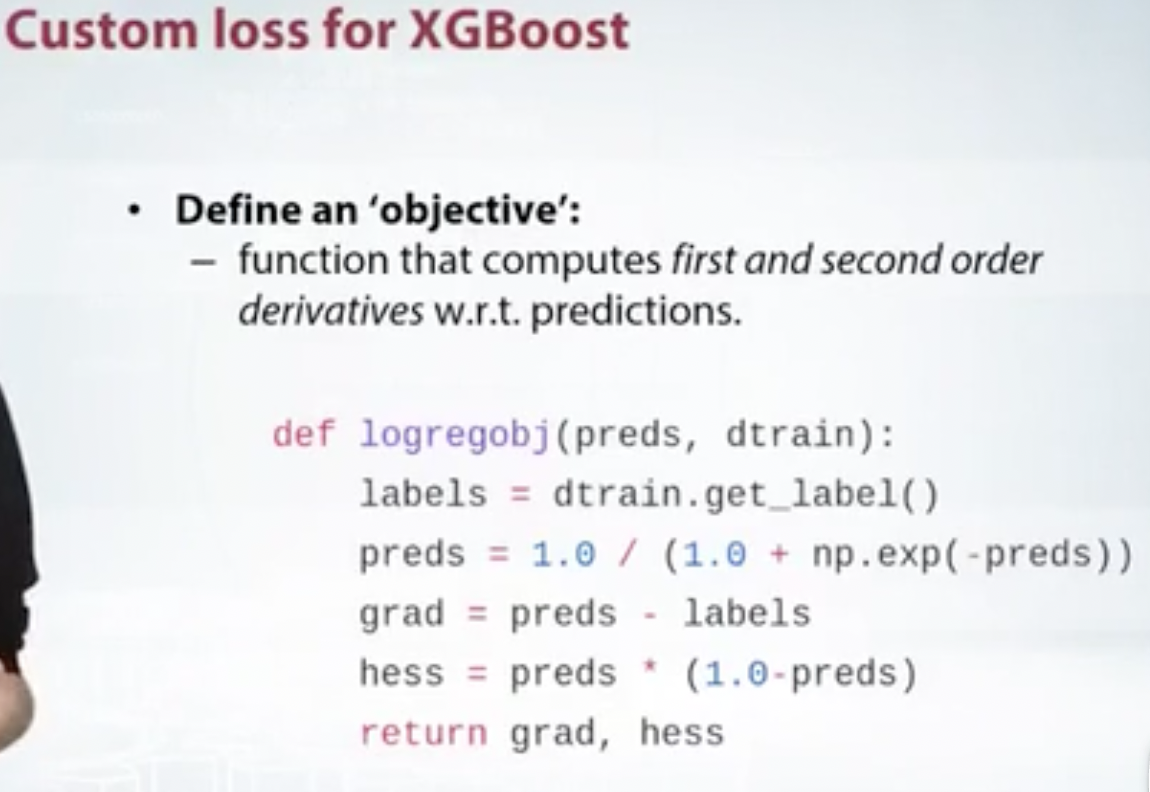
- Our custom loss function should be smooth enough and have well-behaved derivates

### Early stopping
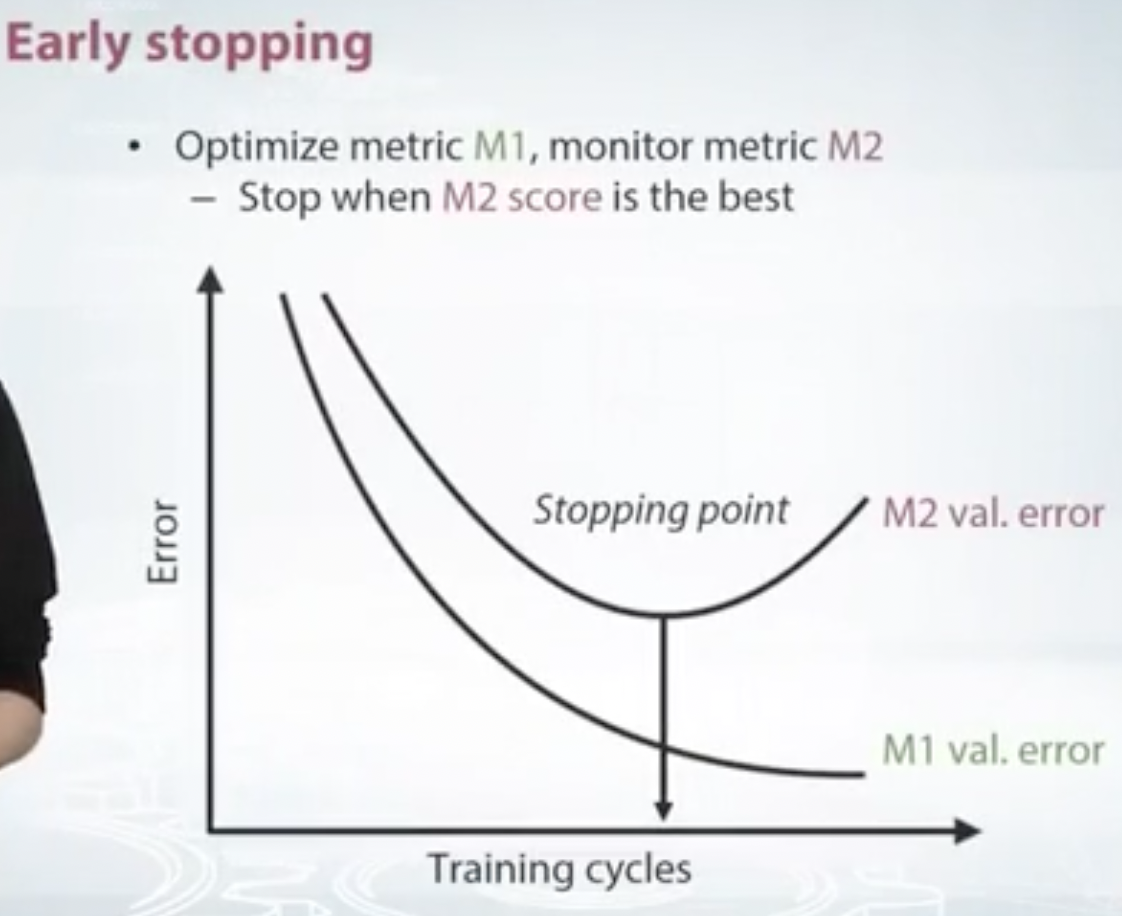
- With early stopping, we set the model to optimize any loss function it can optimize and you monitor the desired metric on a validation set.
- You stop the training when the model starts to fit according to the desired metric and not according to the metric the model is truly optimizing.
- Of course, some metrics can not even be easily evaluated, for example if it is based on a human accessor's opinions, we can not evaluate it on every iteration. For such metrics, we can not use early stopping.

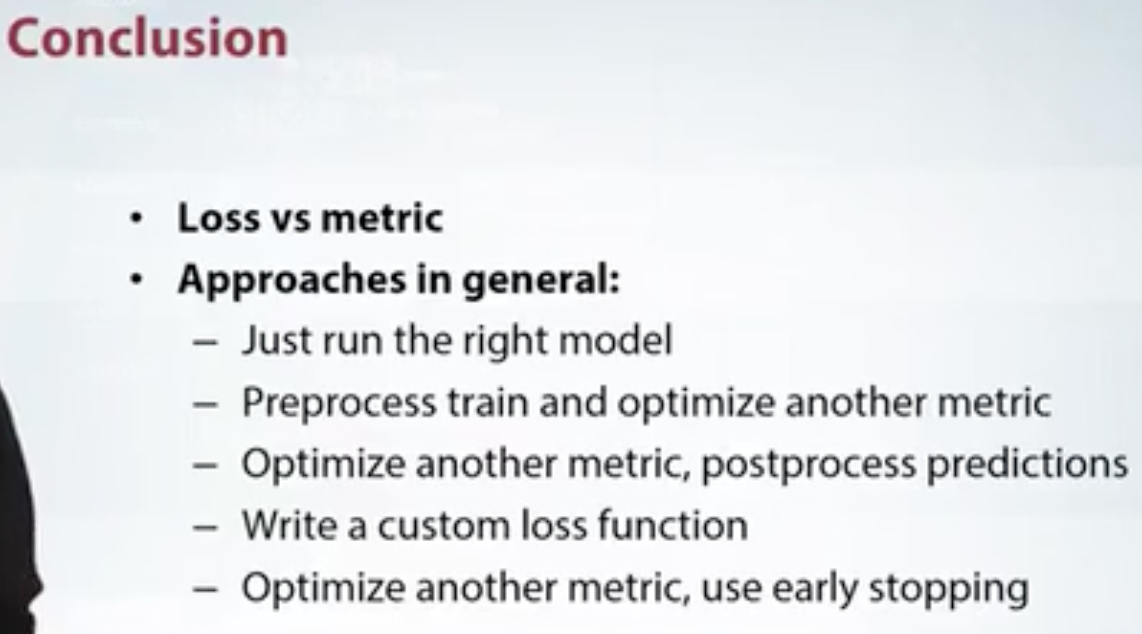

# What I learnt:
- The differences between loss vs metrics:
  - loss is what the model optimizes
  - metrics is what we use to evaluate the model
- Sometimes loss != metrics if our metrics is hard to implement/optimized directly
- Approaches to optimize target metric evaluations:
  - most common metrics can be used directly as loss functions eg MSE, logloss
  - For some of the metrics that cannot be optimized directly (eg MSPE, MAPE, RMSLE), we can preporcess train set and use a model with a metric or loss function that is easy to optimize.
  - Sometimes we will optimize incorrect metric (eg Accuracy, Kappa) but we'll post-process the predictions to fit classification, so it will fit the competition metric better.
  - We could also write custom loss function if it is possible to implement in the library we're using
  - Sometimes it is hard to come up with a neat optimization procedure or write a custom loss function, in such cases, we can consider early stopping where we optimize another loss function but monitor on our target metric. We stop the training when the model fit according to the monitored target metric.
